# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In this assignment, you will continue to study the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
PATH ='/content/drive/MyDrive/Colab Notebooks/Datajarlabs/6-Mastering_the_Exploratory_Data_Analysis'
os.chdir(PATH)

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [ ]:
# renaming scores
df = df.rename(columns={'math score': 'math_score', 'reading score': 'reading_score' , 'writing score': 'writing_score'})
df = df.rename(columns={'parental level of education': 'parental_level_of_education', 'test preparation course': 'test_preparation_course'})
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [ ]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 20 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 15 }

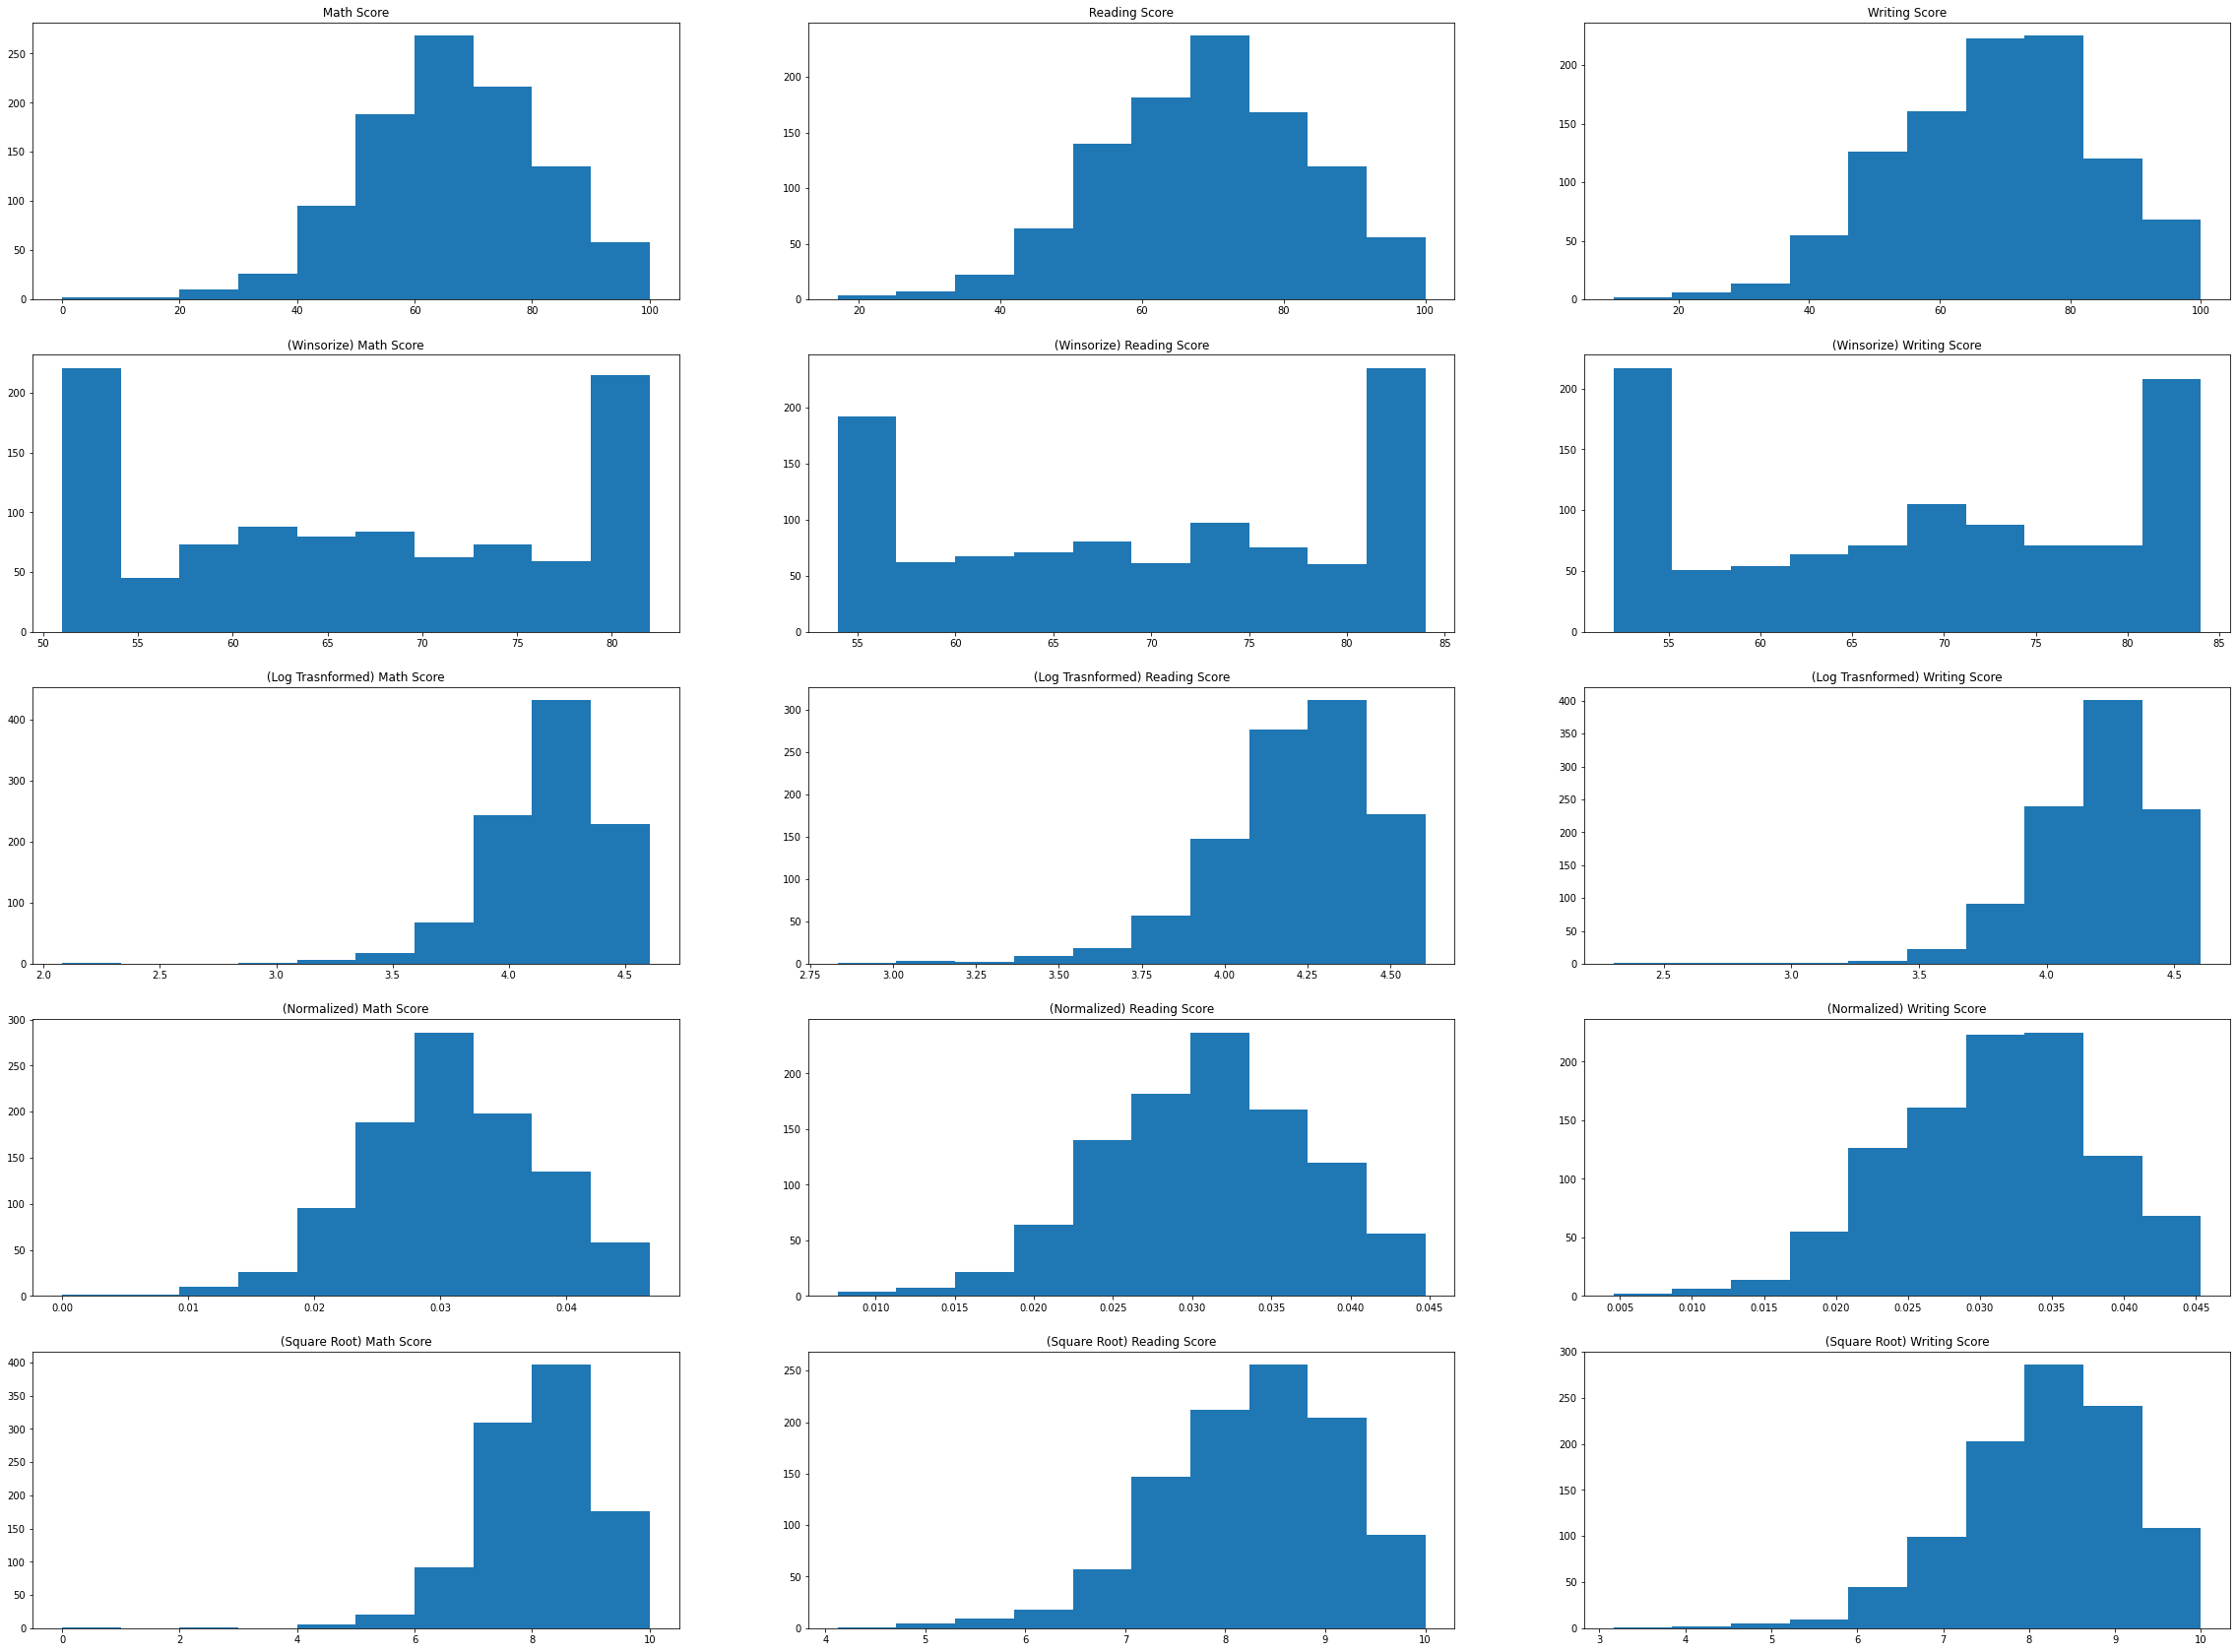

In [ ]:

plt.figure(figsize=(40,30))
scores = ['math_score','reading_score', 'writing_score']
variables = [df['math_score'],df['reading_score'],df['writing_score']]
value = ['Math Score','Reading Score','Writing Score']

for i in range(3):
    plt.subplot(5, 3, i+1)
    plt.hist(variables[i])
    plt.title(" {} ".format(value[i],fontdict=title_font))
    
for i in range(3):
    plt.subplot(5, 3, i+4)
    plt.hist(winsorize(variables[i],(0.15, 0.15)))
    plt.title(" (Winsorize) {} ".format(value[i],fontdict=title_font))
    
for i in range(3):
    plt.subplot(5, 3, i+7)
    plt.hist(np.log(df[variables[i] != 0][scores[i]]))
    plt.title(" (Log Trasnformed) {} ".format(value[i],fontdict=title_font))

for i in range(3):
    plt.subplot(5, 3, i+10)
    plt.hist(normalize(np.array(variables[i]).reshape(1,-1)).reshape(-1,1))
    plt.title(" (Normalized) {} ".format(value[i],fontdict=title_font))

for i in range(3):
    plt.subplot(5, 3, i+13)
    plt.hist(np.sqrt(variables[i]))
    plt.title(" (Square Root) {} ".format(value[i],fontdict=title_font))

plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

variables = ['math_score', 'reading_score' , 'writing_score']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(df[df[variable] != 0][variable]))
    norm_stats = normaltest(np.log(df[df[variable] != 0][variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math_score,1733.57397,0.00000,335.09114,0.00000
1,reading_score,495.12732,0.00000,209.77151,0.00000
2,writing_score,1410.93701,0.00000,318.96921,0.00000


**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [ ]:
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

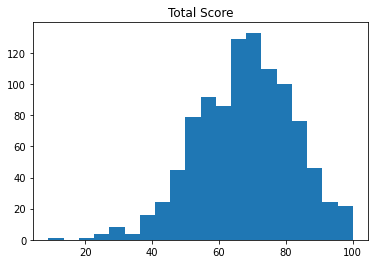

In [ ]:
plt.hist(df['total_score'],bins=20)
plt.title('Total Score')
plt.show()

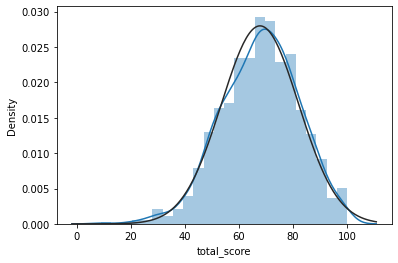

In [ ]:
sns.distplot(df['total_score'],fit=norm);

In [ ]:
jb_stats = jarque_bera(np.log(df[df['total_score'] != 0]['total_score']))
norm_stats = normaltest(np.log(df[df['total_score'] != 0]['total_score']))
print(" variable: {}\n".format('total_score'),
      "jarque_bera_stats: {}\n".format(jb_stats[0]),
      "jarque_bera_p_value: {}\n".format(jb_stats[1]) ,
      "normal_stats: {:.5f}\n".format(norm_stats[0]),
      "normal_p_value: {:.5f}\n".format(norm_stats[1]))


 variable: total_score
 jarque_bera_stats: 2167.0393472287465
 jarque_bera_p_value: 0.0
 normal_stats: 361.83694
 normal_p_value: 0.00000



In [ ]:
df['normalized_total_score'] = normalize(np.array(df['total_score']).reshape(1, -1)).reshape(-1, 1)

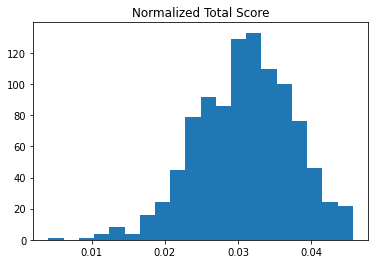

In [ ]:
plt.hist(df['normalized_total_score'],bins=20)
plt.title('Normalized Total Score')
plt.show()

In [ ]:
jb_stats = jarque_bera(df['normalized_total_score'])
norm_stats = normaltest(df['normalized_total_score'])
print(
    "variable: {}".format('normalized_total_score'),
    "jarque_bera_stats: {:.5f}".format(jb_stats[0]),
    "jarque_bera_p_value: {:.5f}".format(jb_stats[1]),
    "normal_stats: {:.5f}".format(norm_stats[0]),
    "normal_p_value: {:.5f}".format(norm_stats[1]),
    sep='\n'
)

variable: normalized_total_score
jarque_bera_stats: 15.45339
jarque_bera_p_value: 0.00044
normal_stats: 15.18672
normal_p_value: 0.00050


**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'normalized_total_score'],
      dtype='object')

In [ ]:
columns = ['gender', 'race/ethnicity','parental_level_of_education', 'lunch','test_preparation_course']
for i in range(len(columns)):
  print("column {} ".format(columns[i]))
  print(df[columns[i]].unique())

column gender 
['female' 'male']
column race/ethnicity 
['group B' 'group C' 'group A' 'group D' 'group E']
column parental_level_of_education 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
column lunch 
['standard' 'free/reduced']
column test_preparation_course 
['none' 'completed']


In [ ]:
features = ['gender', 'race/ethnicity','parental_level_of_education', 'lunch','test_preparation_course']
for i in range(len(features)):
  print(df.groupby(features[i])['total_score'].mean(),"\n")

gender
female   69.56950
male     65.83748
Name: total_score, dtype: float64 

race/ethnicity
group A   62.99251
group B   65.46842
group C   67.13166
group D   69.17939
group E   72.75238
Name: total_score, dtype: float64 

parental_level_of_education
associate's degree   69.56907
bachelor's degree    71.92373
high school          63.09694
master's degree      73.59887
some college         68.47640
some high school     65.10801
Name: total_score, dtype: float64 

lunch
free/reduced   62.19906
standard       70.83721
Name: total_score, dtype: float64 

test_preparation_course
completed   72.66946
none        65.03894
Name: total_score, dtype: float64 



In [ ]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True).rename({'male': 'gender_num'}, axis=1)
df['race/ethnicity'] = df['race/ethnicity'].replace({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 4, 'group E': 5})
df['parental_level_of_education'] = df['parental_level_of_education'].replace(
    {"some high school": 0,
     "high school": 1,
     "some college": 2,
     "associate's degree": 4,
     "bachelor's degree": 5,
     "master's degree": 6})
df['lunch'] = df['lunch'].replace({'free/reduced': 0, 'standard': 1})
df['test_preparation_course'] = df['test_preparation_course'].replace({'none': 0, 'completed': 1})

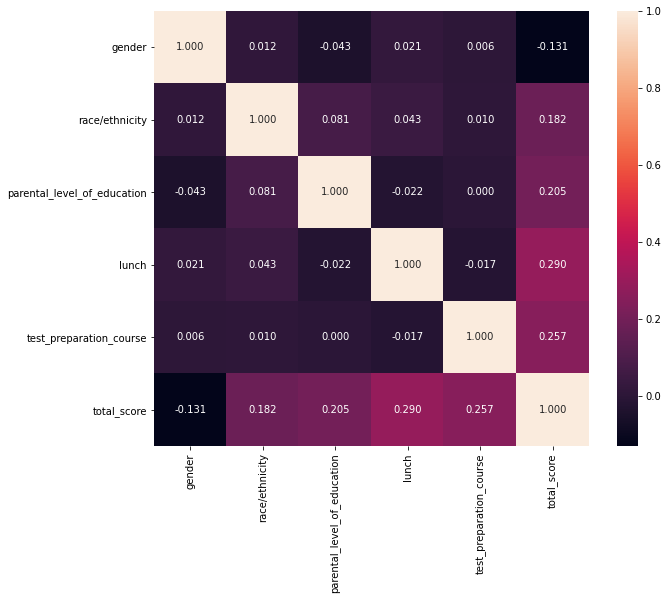

In [ ]:
# correlation between numerical features
plt.figure(figsize=(10, 8))
feature_corr = df.drop(['math_score', 'reading_score', 'writing_score', 'normalized_total_score'], axis=1).corr()
sns.heatmap(feature_corr, annot=True, square=True,annot_kws={'size': 10}, fmt='.3f',cbar=True)

plt.show()

Among the features, we can observe that the highest corelation with the **total_score** (target variable) is the **lunch** and **test_preparation_course** values.

**(4)** Does the test preparation course have an impact on the target variable you created?

In [ ]:
print(df.groupby('test_preparation_course')['total_score'].mean())

test_preparation_course
0   65.03894
1   72.66946
Name: total_score, dtype: float64


Although it is not actually a very high corelation value, yes, it has the second highest corelation among other features.